# 3. Self-consistent field 

## 3.1 The self-consistent field (SCF) procedure  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34 
m=9.110e-31
epsil=8.854e-12
q=1.602e-19

#Lattice
Np=200
a=(10e-10/Np)
R=a*np.array(list(range(1,Np+1)))
t0=(hbar**2)/(2*m*(a**2))/q

#analytical solutions for 1s hydrogen
a0=4*np.pi*epsil*hbar*hbar/(m*q*q)
P0=(4*a/(a0**3))*R*R*np.exp(-2*R/a0)

#Hamiltonian,H = Kinetic,T + Potential,U + Uscf
T=(2*t0*np.diag(np.ones((Np)))-(t0*np.diag(np.ones((Np-1)),1))-(t0*np.diag(np.ones((Np-1)),-1)))
UN=(-q*2/(4*np.pi*epsil))/R #Z=2 for Helium

Uscf=np.zeros((Np)) 
change=1

while change>0.01:
    [D,V]=np.linalg.eigh(T+np.diag(UN+Uscf))
    DD=np.sort(D)
    ind=np.array(list(range(0,len(T))))
    E=D[ind[0]]
    psi=V[:,ind[0]] 
    P=psi*np.conj(psi)
    P=np.transpose(P)
    Unew=(q/(4*np.pi*epsil))*((sum(P/R)-np.cumsum(P/R))+(np.cumsum(P)/R))
    change=sum(abs(Unew-Uscf))/Np
    Uscf=Unew

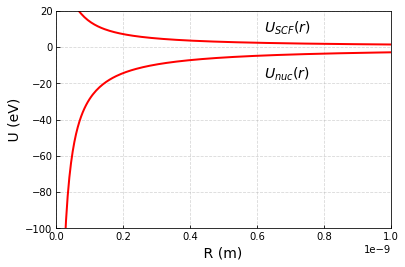

In [2]:
#for figure 3.1.5(a)
plt.figure()

plt.plot(R,UN,'r',lw=2)
plt.plot(R,Uscf,'r',lw=2)
plt.xlabel(' R (m) ',fontsize=14)
plt.ylabel(' U (eV) ',fontsize=14)
plt.xlim(0,1e-9)
plt.ylim(-100,20)
plt.tick_params(axis='both',which='major',direction='in')
plt.text(0.62e-9,8,'$U_{SCF}(r)$',fontsize=14)
plt.text(0.62e-9,-17,'$U_{nuc}(r)$',fontsize=14)
plt.grid(alpha=0.5, ls='--')

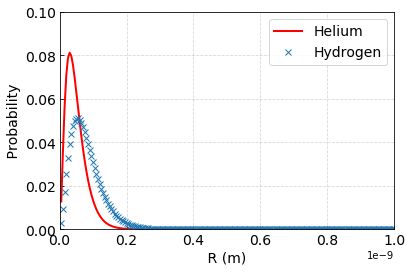

In [3]:
#for figure 3.1.5(b)
plt.figure()

plt.plot(R,P,'r',lw=2, label="Helium")
plt.plot(R,P0,'x',lw=2, label="Hydrogen")
plt.xlabel(' R (m) ',fontsize=14)
plt.ylabel(' Probability ',fontsize=14)
plt.xlim(0,1e-9)
plt.ylim(0,0.1)
plt.tick_params(axis='both',which='major',labelsize=14,direction='in')
plt.grid(alpha=0.5, ls='--')
plt.legend(loc=0,fontsize=14)
#plt.text(0.1e-9,0.07,'Helium',fontsize=15)
#plt.text(0.15e-9,0.03,'Hydrogen',fontsize=15)